In [560]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


### Loading and Exploring the Data

In [561]:
delays_df = pd.read_csv(r'data/airlines_delay.csv') # loading the dataset

In [562]:
delays_df.shape # this shows the shape of the dataset (rows, columns)

(539382, 8)

In [563]:
delays_df # showing the first and last rows and columns of the dataset

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [564]:
delays_df.info() # show the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


### Data Cleaning

#### Cleaning Steps:

    1.Rename the columns to make it easy to understand the Data
    2.Remove decimal points from columns (Flight ID, Length of Flight)
    3.Convert column ‘Time of departure’ from minutes after midnight to time format
    4.Map the values of “DayofWeek” column to their corresponding day names using a dictionary

In [565]:
#change the column names
delays_df.rename(columns={
    'Flight': 'Flight ID',
    'Time': 'Time of departure',
    'Length': 'Length of Flight',
    'Class': 'Delayed',
}, inplace=True)
delays_df.head(5) # show the first 5 rows of the dataset

,Flight ID,Time of departure,Length of Flight,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [566]:
# Change the Flight column from float to integer

delays_df['Flight ID'] = delays_df['Flight ID'].astype(int)
delays_df.head(5)

,Flight ID,Time of departure,Length of Flight,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,2313,1296.0,141.0,DL,ATL,HOU,1,0
1,6948,360.0,146.0,OO,COS,ORD,4,0
2,1247,1170.0,143.0,B6,BOS,CLT,3,0
3,31,1410.0,344.0,US,OGG,PHX,6,0
4,563,692.0,98.0,FL,BMI,ATL,4,0


In [567]:
# Changing the 'Length of Flight' column from float to integer

delays_df['Length of Flight'] = delays_df['Length of Flight'].astype(int)
delays_df.head(5)

,Flight ID,Time of departure,Length of Flight,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,2313,1296.0,141,DL,ATL,HOU,1,0
1,6948,360.0,146,OO,COS,ORD,4,0
2,1247,1170.0,143,B6,BOS,CLT,3,0
3,31,1410.0,344,US,OGG,PHX,6,0
4,563,692.0,98,FL,BMI,ATL,4,0


In [568]:
 # Change 'Time of departure' column from minutes after midnight to HH:MM

delays_df['Time of departure'] = pd.to_datetime(delays_df['Time of departure'].map(lambda x: x*60), unit='s').dt.strftime('%H:%M')
delays_df.head(5)

,Flight ID,Time of departure,Length of Flight,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,2313,21:36,141,DL,ATL,HOU,1,0
1,6948,06:00,146,OO,COS,ORD,4,0
2,1247,19:30,143,B6,BOS,CLT,3,0
3,31,23:30,344,US,OGG,PHX,6,0
4,563,11:32,98,FL,BMI,ATL,4,0


In [569]:
# Change 'DayofWeek' column from numbers to days of the week

delays_df['DayOfWeek'] = delays_df['DayOfWeek'].map({
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
})
delays_df.head(5)

,Flight ID,Time of departure,Length of Flight,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,2313,21:36,141,DL,ATL,HOU,Monday,0
1,6948,06:00,146,OO,COS,ORD,Thursday,0
2,1247,19:30,143,B6,BOS,CLT,Wednesday,0
3,31,23:30,344,US,OGG,PHX,Saturday,0
4,563,11:32,98,FL,BMI,ATL,Thursday,0


### Analyze Data

#### what is the percentage of flights delayed?

In [570]:
# calculate the percentage of delayed flights for Delayed column

delay_pct = round(delays_df['Delayed'].mean() * 100, 2) 
print(f'{delay_pct}% of flights were delayed')


44.54% of flights were delayed


#### which day of the week has the most delays?

In [571]:
# calculate which day of the week has the most delays
delays_by_day = delays_df.groupby('DayOfWeek')['Delayed'].sum()

# organize the data in descending order
delays_by_day = delays_by_day.sort_values(ascending=False)

print(delays_by_day)

DayOfWeek
Wednesday    42254
Thursday     41244
Friday       35515
Monday       34030
Tuesday      31913
Sunday       31693
Saturday     23615
Name: Delayed, dtype: int64


#### which airport has the least amount of delays by percentage?

In [573]:
# Calculate percentage of delayed flights for each airport
best_and_worst = delays_df.groupby('AirportFrom')['Delayed'].mean() * 100

# Organize the data in ascending order
best_and_worst = best_and_worst.sort_values(ascending=True)

# Show the best and worst airports by % of delays
print(best_and_worst.round(2))


AirportFrom
TXK    11.69
FLG    11.87
HTS    12.28
GTR    14.75
TEX    14.81
       ...  
OTH    63.44
HOU    66.72
OAK    71.29
DAL    71.60
MDW    73.52
Name: Delayed, Length: 293, dtype: float64


#### which Airline has the most delays?

In [ ]:
# calculate the number of Delayed flights per Airline
delays_by_airline = delays_df.groupby('Airline')['Delayed'].sum()

# organize the data in descending order
delays_by_airline = delays_by_airline.sort_values(ascending=False)

print(delays_by_airline)

Airline
WN    65657
DL    27452
OO    22760
AA    17736
MQ    12742
CO    11957
XE    11795
US    11591
EV    11255
UA     8946
B6     8459
9E     8226
FL     6275
AS     3892
OH     3502
YV     3334
F9     2899
HA     1786
Name: Delayed, dtype: int64


### Visualizing data

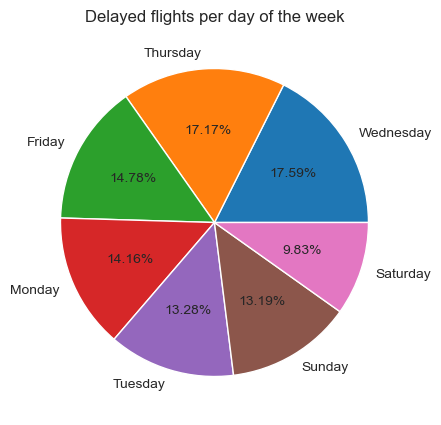

In [ ]:
# Pie chart showing the percentage of delayed flights per day of the week

plt.figure(figsize=(8, 5))
plt.pie(delays_by_day.values, labels=delays_by_day.index, autopct='%.2f%%')
plt.title('Delayed flights per day of the week')
plt.show()

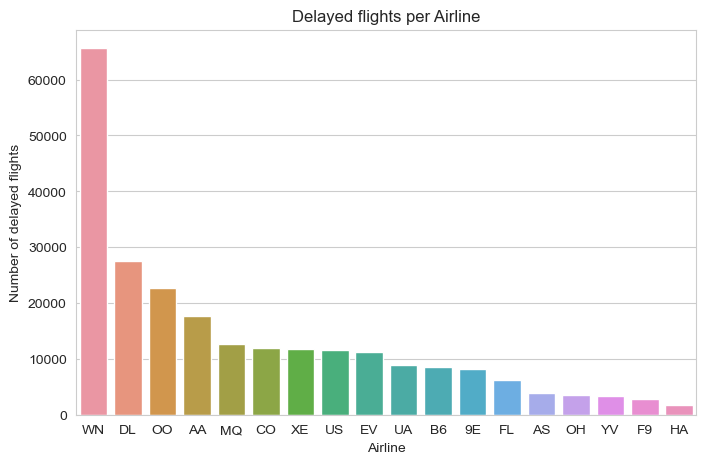

In [ ]:
# bar chart showing the number of delayed flights per airline

plt.figure(figsize=(8, 5))
sns.barplot(x=delays_by_airline.index, y=delays_by_airline.values)
plt.title('Delayed flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of delayed flights')
plt.show()